Part 1: (3 points) Data preprocessing and visualization

You will need to perform data analysis and pre-processing to prepare the images for training. At a minimum, you shoul 

Write code to load the data into Python data structures

Investigate the datasets to determine basic attributes of the images

Ensure data is split for training, validation and testing and perform any additional preprocessing (e.g., rescaling, normalization, etc.) so that it can be used for training/evaluation of the neural networks you will build in Part 2.

In [13]:
!pwd
!cd ~/code
!pwd
# load - train - test

/code/harveyDamage
/bin/bash: line 1: cd: /root/code: No such file or directory
/code/harveyDamage


In [14]:
import os
import pandas as pd
import random
import shutil
from pathlib import Path

data_dir = Path("datasets/unit03/Project3")
positive_dir = data_dir / "damage"
negative_dir = data_dir / "no_damage"

output_dir = Path("datasets/unit03/Project3")
train_pos = output_dir / "train/damage"
test_pos = output_dir / "test/damage"
train_neg = output_dir / "train/no_damage"
test_neg = output_dir / "test/no_damage"

for d in [train_pos, test_pos, train_neg, test_neg]:
    d.mkdir(parents=True, exist_ok=True)

all_damage_file_paths = os.listdir('coe379L-sp25/datasets/unit03/Project3/damage')
all_no_damage_file_paths = os.listdir('coe379L-sp25/datasets/unit03/Project3/no_damage')

# def split_and_copy(src_dir, train_dest, test_dest, split_ratio=0.7):
#     files = list(src_dir.glob("*"))
#     random.shuffle(files)
#     split_idx = int(len(files) * split_ratio)
#     train_files = files[:split_idx]
#     test_files = files[split_idx:]
    
#     for f in train_files:
#         shutil.copy(f, train_dest / f.name)
#     for f in test_files:
#         shutil.copy(f, test_dest / f.name)

# split_and_copy(positive_dir, train_pos, test_pos)
# split_and_copy(negative_dir, train_neg, test_neg)


In [15]:
import random

train_damage_paths = random.sample(all_damage_file_paths, int(len(all_damage_file_paths)*0.8))
print("train damage image count: ", len(train_damage_paths))
test_damage_paths = [ p for p in all_damage_file_paths if p not in train_damage_paths]
print("test damage image count: ", len(test_damage_paths))
# ensure no overlap:
overlap = [p for p in train_damage_paths if p in test_damage_paths]
print("len of overlap: ", len(overlap))

train_no_damage_paths = random.sample(all_no_damage_file_paths, int(len(all_no_damage_file_paths)*0.8))
print("train no-damage image count: ", len(train_no_damage_paths))
test_no_damage_paths = [ p for p in all_no_damage_file_paths if p not in train_no_damage_paths]
print("test no-damage image count: ", len(test_no_damage_paths))
# ensure no overlap:
overlap = [p for p in train_no_damage_paths if p in test_no_damage_paths]
print("len of overlap: ", len(overlap))

train damage image count:  11336
test damage image count:  2835
len of overlap:  0
train no-damage image count:  5721
test no-damage image count:  1431
len of overlap:  0


In [16]:
# # ensure to copy the images to the directories
# import shutil
# for p in train_damage_paths:
#     shutil.copyfile(os.path.join('datasets/unit03/Project3/train/damage', p), os.path.join('coe379L-sp25/datasets/unit03/Project3/damage', p) )

# for p in test_damage_paths:
#     shutil.copyfile(os.path.join('datasets/unit03/Project3/test/damage', p), os.path.join('coe379L-sp25/datasets/unit03/Project3/damage', p) )

# for p in train_no_damage_paths:
#     shutil.copyfile(os.path.join('datasets/unit03/Project3/train/no_damage', p), os.path.join('coe379L-sp25/datasets/unit03/Project3/no_damage', p) )

# for p in test_no_damage_paths:
#     shutil.copyfile(os.path.join('datasets/unit03/Project3/test/no_damage', p), os.path.join('coe379L-sp25/datasets/unit03/Project3/no_damage', p) )

# # check counts:
# print("Files in train/damage: ", len(os.listdir('datasets/unit03/Project3/train/damage')))
# print("Files in train/no_damage: ", len(os.listdir('datasets/unit03/Project3/train/no_damage')))

# print("Files in test/damage: ", len(os.listdir('datasets/unit03/Project3/test/damage')))
# print("Files in test/no_damage: ", len(os.listdir('datasets/unit03/Project3/test/no_damage')))

In [17]:
import shutil
import os

# Ensure to copy the images to the directories
for p in train_damage_paths:
    src = os.path.join('coe379L-sp25/datasets/unit03/Project3/damage', p)
    dst = os.path.join('datasets/unit03/Project3/train/damage', p)
    #print(src)
    #print(dst)

    # Skip if the source is a directory (like .ipynb_checkpoints)
    if os.path.isdir(src):
        continue  # Skip this iteration and move to the next file

    # Copy the file if it is not a directory
    shutil.copyfile(src, dst)

for p in test_damage_paths:
    src = os.path.join('coe379L-sp25/datasets/unit03/Project3/damage', p)
    dst = os.path.join('datasets/unit03/Project3/test/damage', p)
    # Skip if the source is a directory (like .ipynb_checkpoints)
    if os.path.isdir(src):
        continue  # Skip this iteration and move to the next file

    # Copy the file if it is not a directory
    shutil.copyfile(src, dst)

for p in train_no_damage_paths:
    src = os.path.join('coe379L-sp25/datasets/unit03/Project3/no_damage', p)
    dst = os.path.join('datasets/unit03/Project3/train/no_damage', p)
    # Skip if the source is a directory (like .ipynb_checkpoints)
    if os.path.isdir(src):
        continue  # Skip this iteration and move to the next file

    # Copy the file if it is not a directory
    shutil.copyfile(src, dst)

for p in test_no_damage_paths:
    src = os.path.join('coe379L-sp25/datasets/unit03/Project3/no_damage', p)
    dst = os.path.join('datasets/unit03/Project3/test/no_damage', p)
    # Skip if the source is a directory (like .ipynb_checkpoints)
    if os.path.isdir(src):
        continue  # Skip this iteration and move to the next file

    # Copy the file if it is not a directory
    shutil.copyfile(src, dst)

# Check counts:
print("Files in train/damage: ", len(os.listdir('datasets/unit03/Project3/train/damage')))
print("Files in train/no_damage: ", len(os.listdir('datasets/unit03/Project3/train/no_damage')))
print("Files in test/damage: ", len(os.listdir('datasets/unit03/Project3/test/damage')))
print("Files in test/no_damage: ", len(os.listdir('datasets/unit03/Project3/test/no_damage')))


Files in train/damage:  11335
Files in train/no_damage:  5721
Files in test/damage:  2835
Files in test/no_damage:  1431


In [18]:
#Total Train
print("Total Train: ", len(train_damage_paths) + len(train_no_damage_paths))

#Total Test
print(" Total Test: ", len(test_damage_paths) + len(test_no_damage_paths))

#Total Images
print(" Total: ", len(train_damage_paths) + len(train_no_damage_paths) + len(test_damage_paths) + len(test_no_damage_paths))

#Ratio
print(" Test Ratio: ", (len(test_damage_paths) + len(test_no_damage_paths) )/ 21323)
print(" Test Ratio: ", (len(train_damage_paths) + len(train_no_damage_paths) )/ 21323)

Total Train:  17057
 Total Test:  4266
 Total:  21323
 Test Ratio:  0.20006565680251373
 Test Ratio:  0.7999343431974862


Randomly selected image: coe379L-sp25/datasets/unit03/Project3/damage/-95.546805_29.757352.jpeg


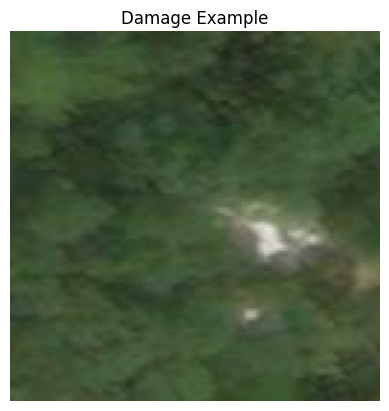

Size (width, height): (128, 128)
Mode: RGB
Format: JPEG


In [19]:
#image attributes: 

# Size (width, height): (128, 128)
# Mode: RGB
# Format: JPEG

import matplotlib.pyplot as plt
from PIL import Image
import os

import random
from pathlib import Path

import random
from pathlib import Path

damage_folder = Path("coe379L-sp25/datasets/unit03/Project3/damage")

image_files = list(damage_folder.glob("*.[jJpP]*[gGnN]*"))  # catches jpg, jpeg, png, etc.


img_path = random.choice(image_files)

print("Randomly selected image:", img_path)
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")  # hides axes
plt.title("Damage Example")
plt.show()

print("Size (width, height):", img.size)
print("Mode:", img.mode)
print("Format:", img.format)


In [20]:
# # rescaling / normalization

# from PIL import Image
# from pathlib import Path
# import numpy as np

# # Input dataset path
# base_path = Path("datasets/unit03/Project3")  # Adjust this to your structure

# # Output path for normalized images
# # ??
# normalized_path = Path("preDatasets/unit03/Project3")
# normalized_path.mkdir(parents=True, exist_ok=True)

# # Folder splits and class names
# splits = ['train', 'test']
# classes = ['damage', 'no_damage']

# for split in splits:
#     for cls in classes:
#         src_folder = base_path / split / cls
#         dest_folder = normalized_path / split / cls
#         dest_folder.mkdir(parents=True, exist_ok=True)

#         img_files = list(src_folder.glob("*.*"))

#         for img_path in img_files:
#             try:
#                 # Load image in RGB
#                 img = Image.open(img_path).convert("RGB")
                
#                 # Normalize image (scale to [0, 1]) and back to [0, 255] uint8
#                 img_array = np.array(img) / 255.0
#                 normalized_array = (img_array * 255).astype(np.uint8)
#                 normalized_img = Image.fromarray(normalized_array)

#                 # Save normalized image with same filename
#                 out_path = dest_folder / img_path.name
#                 normalized_img.save(out_path)

#             except Exception as e:
#                 print(f"Error processing {img_path.name}: {e}")


# #Total Train
# print("Total Train: ", len(preDatasets/unit03/Project3) )

# #Total Test
# print(" Total Test: ", len(test_damage_paths) + len(test_no_damage_paths))

# #Total Images
# print(" Total: ", len(train_damage_paths) + len(train_no_damage_paths) + len(test_damage_paths) + len(test_no_damage_paths))



In [21]:
# import needed classes and functions
import tensorflow as tf
import tensorflow_datasets as tfds
#from tensorflow.keras.layers.experimental.preprocessing import Rescaling
#from tensorflow.keras.layers.preprocessing import Rescaling
from tensorflow.keras.layers import Rescaling



# path to training data
train_data_dir = 'datasets/unit03/Project3/train' # select train folder <-------------------------------------

# controls the size of the "batches" of images streamed when accessing the datasets.
# this is useful to control the memory usage with very large datasets
batch_size = 32

# target image size
img_height = 128
img_width = 128

# note that the subset parameter can take values of "training", "validation", or "both";
# the value dictates which dataset is returned (we want both)
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# rescale instance
rescale = Rescaling(scale=1.0/255)

# apply the rescale to the train and validation sets
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))

2025-04-14 20:29:00.502172: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 20:29:00.517501: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 20:29:00.527993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744662540.546991   18017 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744662540.552778   18017 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744662540.576028   18017 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Found 17056 files belonging to 2 classes.
Using 13645 files for training.
Using 3411 files for validation.


2025-04-14 20:29:04.166356: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [22]:
# path to test data
test_data_dir = 'datasets/unit03/Project3/test' # select test folder <-------------------------------------

# we do not set subset=both here because we do not want the test set split
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

Found 4266 files belonging to 2 classes.


Part 2: (10 points) Model design, training and evaluation

You will explore different model architectures that we have seen in class, including:

A dense (i.e., fully connected) ANN

The Lenet-5 CNN architecture

Alternate-Lenet-5 CNN architecture, described in the following paper (Table 1, Page 12 of the research paper https://arxiv.org/pdf/1807.01688.pdf, but note that the dataset is not the same as that analyzed in thed in the paper.)

In [23]:
# dense - any # of layers

from keras import layers
from keras import models
import pandas as pd
from keras import optimizers

# Intializing a sequential model
model_cnn = models.Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 ,
# Recall: using padding='same' ensures the output size has the same shape as the input size
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128,128,3))) #First COnv2D Layer

# Adding max pooling to reduce the size of output of first conv layer
model_cnn.add(layers.MaxPooling2D((2, 2), padding='same'))

model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model_cnn.add(layers.MaxPooling2D((2, 2), padding='same'))

model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model_cnn.add(layers.MaxPooling2D((2, 2), padding='same')) #MaxPooling 2D layer

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_cnn.add(layers.Flatten())

# Adding a fully connected dense layer with 100 neurons
model_cnn.add(layers.Dense(100, activation='relu'))

# Adding a fully connected dense layer with 84 neurons
model_cnn.add(layers.Dense(84, activation='relu'))

# Adding the output layer with * neurons and activation functions as softmax since this is a multi-class classification problem
model_cnn.add(layers.Dense(2, activation='softmax')) #MaxPooling Output Layer - dam/nodam

# Compile model
# RMSprop (Root Mean Square Propagation) is commonly used in training deep neural networks.
model_cnn.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_cnn.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │         8,484 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 857,458 (3.27 MB)

 Trainable params: 857,458 (3.27 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# fit the model from image generator
history = model_cnn.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=20,
            validation_data=val_rescale_ds
)

Epoch 1/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 142s 330ms/step - accuracy: 0.6929 - loss: 0.6064 - val_accuracy: 0.8150 - val_loss: 0.4944
Epoch 2/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 136s 317ms/step - accuracy: 0.8208 - loss: 0.4270 - val_accuracy: 0.8262 - val_loss: 0.3909
Epoch 3/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 131s 307ms/step - accuracy: 0.8569 - loss: 0.3642 - val_accuracy: 0.8918 - val_loss: 0.2926
Epoch 4/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 132s 310ms/step - accuracy: 0.8827 - loss: 0.3056 - val_accuracy: 0.9129 - val_loss: 0.2478
Epoch 5/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 127s 298ms/step - accuracy: 0.9123 - loss: 0.2412 - val_accuracy: 0.8886 - val_loss: 0.3057
Epoch 6/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 119s 279ms/step - accuracy: 0.9227 - loss: 0.2012 - val_accuracy: 0.9296 - val_loss: 0.2054
Epoch 7/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 123s 288ms/step - accuracy: 0.9292 - loss: 0.1838 - val_accuracy: 0.9332 - val_loss: 0.1828
Epoch 8/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 120s 282ms/step - accuracy: 0.9372 -

In [25]:
test_loss, test_accuracy = model_cnn.evaluate(test_rescale_ds, verbose=0)
test_accuracy

0.9669479727745056

In [26]:
# Lenet - 5 - can follow class example

In [27]:
from keras import layers
from keras import models
import pandas as pd

model_lenet5 = models.Sequential()

# Layer 1: Convolutional layer with 6 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 16 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
# which layer
model_lenet5.add(layers.Flatten())

# Layer 3: Fully connected layer with 120 neurons
model_lenet5.add(layers.Dense(120, activation='relu'))

# Layer 4: Fully connected layer with 84 neurons
model_lenet5.add(layers.Dense(84, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 3 )
model_lenet5.add(layers.Dense(3, activation='softmax'))

# Compile model
model_lenet5.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_lenet5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 63, 63, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 30, 30, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │     1,728,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,739,587 (6.64 MB)

 Trainable params: 1,739,587 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# fit the model from image generator
history = model_lenet5.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=20,
            validation_data=val_rescale_ds
)

Epoch 1/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.6626 - loss: 0.6904 - val_accuracy: 0.6693 - val_loss: 0.6237
Epoch 2/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.7604 - loss: 0.5114 - val_accuracy: 0.8358 - val_loss: 0.4353
Epoch 3/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.8143 - loss: 0.4267 - val_accuracy: 0.8229 - val_loss: 0.3934
Epoch 4/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.8353 - loss: 0.3822 - val_accuracy: 0.8091 - val_loss: 0.4406
Epoch 5/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8531 - loss: 0.3410 - val_accuracy: 0.8396 - val_loss: 0.3663
Epoch 6/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.8674 - loss: 0.3098 - val_accuracy: 0.7933 - val_loss: 0.4491
Epoch 7/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8752 - loss: 0.2910 - val_accuracy: 0.8839 - val_loss: 0.2928
Epoch 8/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8920 - loss: 0.2667 - 

In [29]:
test_loss, test_accuracy = model_lenet5.evaluate(test_rescale_ds, verbose=0)
test_accuracy

0.9254571199417114

In [30]:
# Alternate - Lenet - 5

In [50]:
from keras import layers, models, optimizers

model_lenet5 = models.Sequential()

# Layer 1: Convolutional layer with 32 filters of size 3x3 (modified from 6 filters)
model_lenet5.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))  # Modified: Increased filters
model_lenet5.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Modified: Changed average pooling to max pooling

# Layer 2: Convolutional layer with 64 filters of size 3x3 (modified from 16 filters)
model_lenet5.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Modified: Increased filters
model_lenet5.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Modified: Changed average pooling to max pooling

# Flatten the feature maps to feed into fully connected layers
model_lenet5.add(layers.Flatten())

# Layer 3: Fully connected layer with 256 neurons (modified from 120 neurons)
model_lenet5.add(layers.Dense(256, activation='relu'))  # Modified: Increased number of neurons

# Layer 4: Fully connected layer with 128 neurons (modified from 84 neurons)
model_lenet5.add(layers.Dense(128, activation='relu'))  # Modified: Increased number of neurons

# Output layer: Fully connected layer with 1 neuron (for binary classification, sigmoid activation)
# If multi-class classification, change to the number of classes (e.g., 3 or more)
model_lenet5.add(layers.Dense(1, activation='sigmoid'))  # Modified: Binary classification with sigmoid activation

# Compile model
model_lenet5.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])  # Modified loss for binary classification

# Generating the summary of the model
model_lenet5.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,798,273 (56.45 MB)

 Trainable params: 14,798,273 (56.45 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# import tensorflow as tf
# from tensorflow.keras import layers, models, optimizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Paths to your train and test directories
# train_data_dir = 'path_to_train_data'  # Train data path (should have 'damaged' and 'undamaged' subdirectories) ---------
# test_data_dir = 'path_to_test_data'    # Test data path (should have 'damaged' and 'undamaged' subdirectories) -----------


# # Data Augmentation and Preprocessing for already scaled data
# train_datagen = ImageDataGenerator(
#     # No rescaling, assuming data is already in [0, 1]
#     rotation_range=40,  # Random rotations for augmentation
#     width_shift_range=0.2,  # Horizontal shifts
#     height_shift_range=0.2,  # Vertical shifts
#     shear_range=0.2,  # Shear transformations
#     zoom_range=0.2,  # Zoom in/out
#     horizontal_flip=True,  # Randomly flip images horizontally
#     fill_mode='nearest'  # Fill in missing pixels from transformations
# )

# test_datagen = ImageDataGenerator()  # No rescaling, assuming test data is also [0, 1]

# # Load the training and test datasets using the flow_from_directory method
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(128, 128),  # Resize images to 128x128
#     batch_size=32,
#     class_mode='binary'  # Binary classification (damaged vs. undamaged)
# )

# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=(128, 128),  # Resize images to 128x128
#     batch_size=32,
#     class_mode='binary'  # Binary classification
# )


# # Model Architecture: Modified LeNet-5 Approach
# model_cnn = models.Sequential()

# # First Convolutional Layer: 32 filters, 5x5 kernel, ReLU activation
# model_cnn.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(128, 128, 3)))

# # MaxPooling Layer: 2x2 pool size
# model_cnn.add(layers.MaxPooling2D((2, 2), padding='same'))

# # Second Convolutional Layer: 64 filters, 5x5 kernel, ReLU activation
# model_cnn.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# # MaxPooling Layer: 2x2 pool size
# model_cnn.add(layers.MaxPooling2D((2, 2), padding='same'))

# # Flatten the output for the fully connected layer
# model_cnn.add(layers.Flatten())

# # Fully Connected Layer: 120 neurons, ReLU activation
# model_cnn.add(layers.Dense(120, activation='relu'))

# # Fully Connected Layer: 84 neurons, ReLU activation
# model_cnn.add(layers.Dense(84, activation='relu'))

# # Output Layer: 1 neuron (for binary classification), sigmoid activation
# model_cnn.add(layers.Dense(1, activation='sigmoid'))

# # Compile the model
# model_cnn.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
#                   loss='binary_crossentropy',  # Binary classification loss
#                   metrics=['accuracy'])

# # Model Summary
# model_cnn.summary()

# # Train the model
# history = model_cnn.fit(
#     train_generator,  # Training data generator
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Steps per epoch
#     epochs=20,  # Number of epochs
#     validation_data=test_generator,  # Validation data generator
#     validation_steps=test_generator.samples // test_generator.batch_size  # Validation steps
# )

In [51]:
# fit the model from image generator
history = model_lenet5.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=1,
            validation_data=val_rescale_ds
)

427/427 ━━━━━━━━━━━━━━━━━━━━ 95s 220ms/step - accuracy: 0.6770 - loss: 0.6184 - val_accuracy: 0.8332 - val_loss: 0.4500


In [47]:
test_loss, test_accuracy = model_lenet5.evaluate(test_rescale_ds, verbose=0)
test_accuracy

0.9512423872947693

Part 3: (7 points) Model inference server and deployment **help class site MLOps -> developing an inference server in flask

For the best model built in part 2, persist the trained model to disk so that it can be reconstituted easily. Develop a simple inference server to serve your trained model over HTTP. There should be at least two endpoints:

A model summary endpoint GET /summary providing metadata about the model.

Note: This endpoint must be accept requests to: GET /summary and it must return a JSON response.

An inference endpoint POST /inference that can perform classification on a

#cannot build docker image in jupyter server (use command line on VM)
everything in your notebook should be on machine in nb-data

Dockerfile and api.py can be created in notebook but docker build and docker commands (run) cant be in jupter


unit 3 for project have to do option 1
1/ Requre the user send a raw image file, such as a png or jpgn image.

In [35]:
# Save the trained model
# Save the model in the new .keras format
model_lenet5.save('bst_model.keras')

Part 4: (7 points) Write a 3 page report summarizing your work. (info on class page)) (1 pt)

In [36]:
#import tensorflow as tf
#model = tf.keras.models.load_model('b_model.keras')

##model.load("b_mode.keras")

In [37]:
!pwd

/code/harveyDamage


In [60]:
# type(test_rescale_ds)
type(test_ds)
for t in test_rescale_ds:
    print(t)
    break

(<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.4039216 , 0.46274513, 0.33333334],
         [0.3921569 , 0.45098042, 0.32156864],
         [0.37647063, 0.43529415, 0.30588236],
         ...,
         [0.09411766, 0.18431373, 0.12156864],
         [0.10980393, 0.20392159, 0.14117648],
         [0.1254902 , 0.21960786, 0.15686275]],

        [[0.38431376, 0.4431373 , 0.3137255 ],
         [0.38823533, 0.44705886, 0.31764707],
         [0.39607847, 0.454902  , 0.3254902 ],
         ...,
         [0.10196079, 0.19215688, 0.12941177],
         [0.10196079, 0.19607845, 0.13333334],
         [0.10588236, 0.20000002, 0.13725491]],

        [[0.3921569 , 0.45098042, 0.32156864],
         [0.39607847, 0.454902  , 0.3254902 ],
         [0.4039216 , 0.46274513, 0.33333334],
         ...,
         [0.10196079, 0.19215688, 0.12941177],
         [0.09803922, 0.18823531, 0.1254902 ],
         [0.09803922, 0.18823531, 0.1254902 ]],

        ...,

        [[0.38823533, 0.45098042

In [74]:
# import numpy as np
# path = 'coe379L-sp25/code/Project3/data/no_damage/-95.6567_29.835759999999997.jpeg'
# img = Image.open(path).resize((128, 128))
# img_array = np.array(img) / 255.0
# img_list = np.expand_dims(img_array, axis=0)

# # print(img_list)
# # Make prediction
# prediction = model_lenet5.predict(img_list)
# print(prediction)
# predicted_class = 'damage' if prediction[0][0] > 0.5 else 'no_damage'  # Adjust threshold as needed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.55635965]]
